In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data.shape

(5822, 86)

In [112]:
import pandas as pd
import re

# Load the content of the dictionary.txt file
with open('../docs/insurance+company+benchmark+coil+2000/dictionary.txt', 'r', encoding='ISO-8859-1') as file:
    file_content = file.read()


# Extract the Data Dictionary table using regular expressions
pattern = re.compile(r"(\d+)\s+([A-Z]+[A-Z0-9]*)\s+(.+?)(?=\d+\s+|L0:)", re.DOTALL)
matches = pattern.findall(file_content)

# Create a DataFrame from the matches
df = pd.DataFrame(matches, columns=['Nr', 'Name', 'Description'])

# Clean up the 'Description' column to remove extra line breaks and spaces
df['Description'] = df['Description'].str.replace('\n', ' ').str.strip()

# Convert 'Nr' column to integer
df['Nr'] = df['Nr'].astype(int)

# Display the DataFrame
df


,Nr,Name,Description
0,1,MOSTYPE,Customer Subtype see L
1,2,MAANTHUI,Number of houses
2,3,MGEMOMV,Avg size household
3,4,MGEMLEEF,Avg age see L
4,5,MOSHOOFD,Customer main type see L
...,...,...,...
81,82,APLEZIER,Number of boat policies
82,83,AFIETS,Number of bicycle policies
83,84,AINBOED,Number of property insurance policies
84,85,ABYSTAND,Number of social security insurance policies


In [113]:

# Define a pattern to extract each L table (L0, L1, L2, L3, L4)
l_tables_pattern = re.compile(r"(L\d+):\n\n(.*?)\n\n", re.DOTALL)
l_tables_matches = l_tables_pattern.findall(file_content)

# Dictionary to store the DataFrames
l_tables_dict = {}

# Process each L table
for table_name, table_content in l_tables_matches:
    # Split the table content into lines
    lines = table_content.strip().split('\n')
    
    # Split each line into two parts: value and label
    data = [line.split(maxsplit=1) for line in lines if len(line.split(maxsplit=1)) == 2]
    
    # Create a DataFrame and store it in the dictionary
    df1 = pd.DataFrame(data, columns=['Value', 'Label'])
    l_tables_dict[table_name] = df1

# Display the dictionary keys to confirm extraction
l_tables_dict.keys()
l_tables_dict['L0'] = l_tables_dict['L0'].iloc[1:].reset_index(drop=True)


In [114]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Create a list of new column names using the 'Name' column from df
new_column_names = df['Name'].tolist()

# Rename the columns in train_data using the new_column_names list
train_data.columns = new_column_names

# Display the updated DataFrame
train_data.head()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [123]:
train_data.shape

(5822, 86)

In [126]:
train_data['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

/Users/martinjaramillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


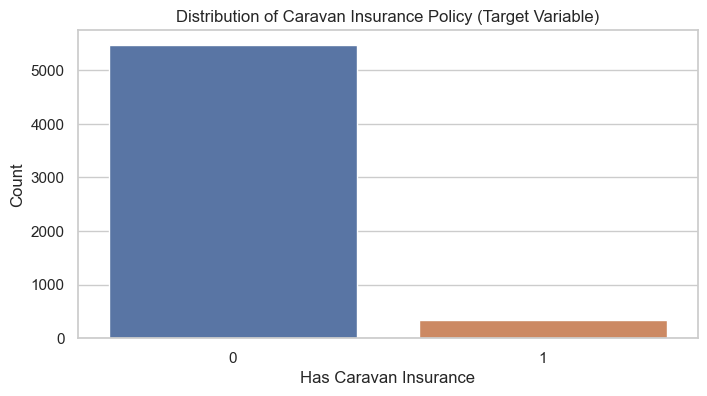

In [127]:
# EDA - Distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(train_data['CARAVAN'])
plt.title('Distribution of Caravan Insurance Policy (Target Variable)')
plt.xlabel('Has Caravan Insurance')
plt.ylabel('Count')
plt.show()

In [128]:
# Correlation analysis
# Checking the correlation between features and the target
correlation = train_data.corr()['CARAVAN'].sort_values(ascending=False)
print("\nTop 10 features positively correlated with CARAVAN:")
print(correlation.head(11)) # Including 'CARAVAN' itself

print("\nTop 10 features negatively correlated with CARAVAN:")
print(correlation.tail(10))


Top 10 features positively correlated with CARAVAN:
CARAVAN     1.000000
PPERSAUT    0.150910
APERSAUT    0.144210
APLEZIER    0.105700
PWAPART     0.096463
MKOOPKLA    0.095938
PBRAND      0.094446
PPLEZIER    0.091361
MINKGEM     0.090185
AWAPART     0.089387
MOPLHOOG    0.084635
Name: CARAVAN, dtype: float64

Top 10 features negatively correlated with CARAVAN:
MBERARBO   -0.054632
MZFONDS    -0.058378
MRELOV     -0.062285
MSKD       -0.063070
MOSHOOFD   -0.069300
MOSTYPE    -0.069385
MAUT0      -0.076501
MHHUUR     -0.079143
MINKM30    -0.079765
MOPLLAAG   -0.090561
Name: CARAVAN, dtype: float64


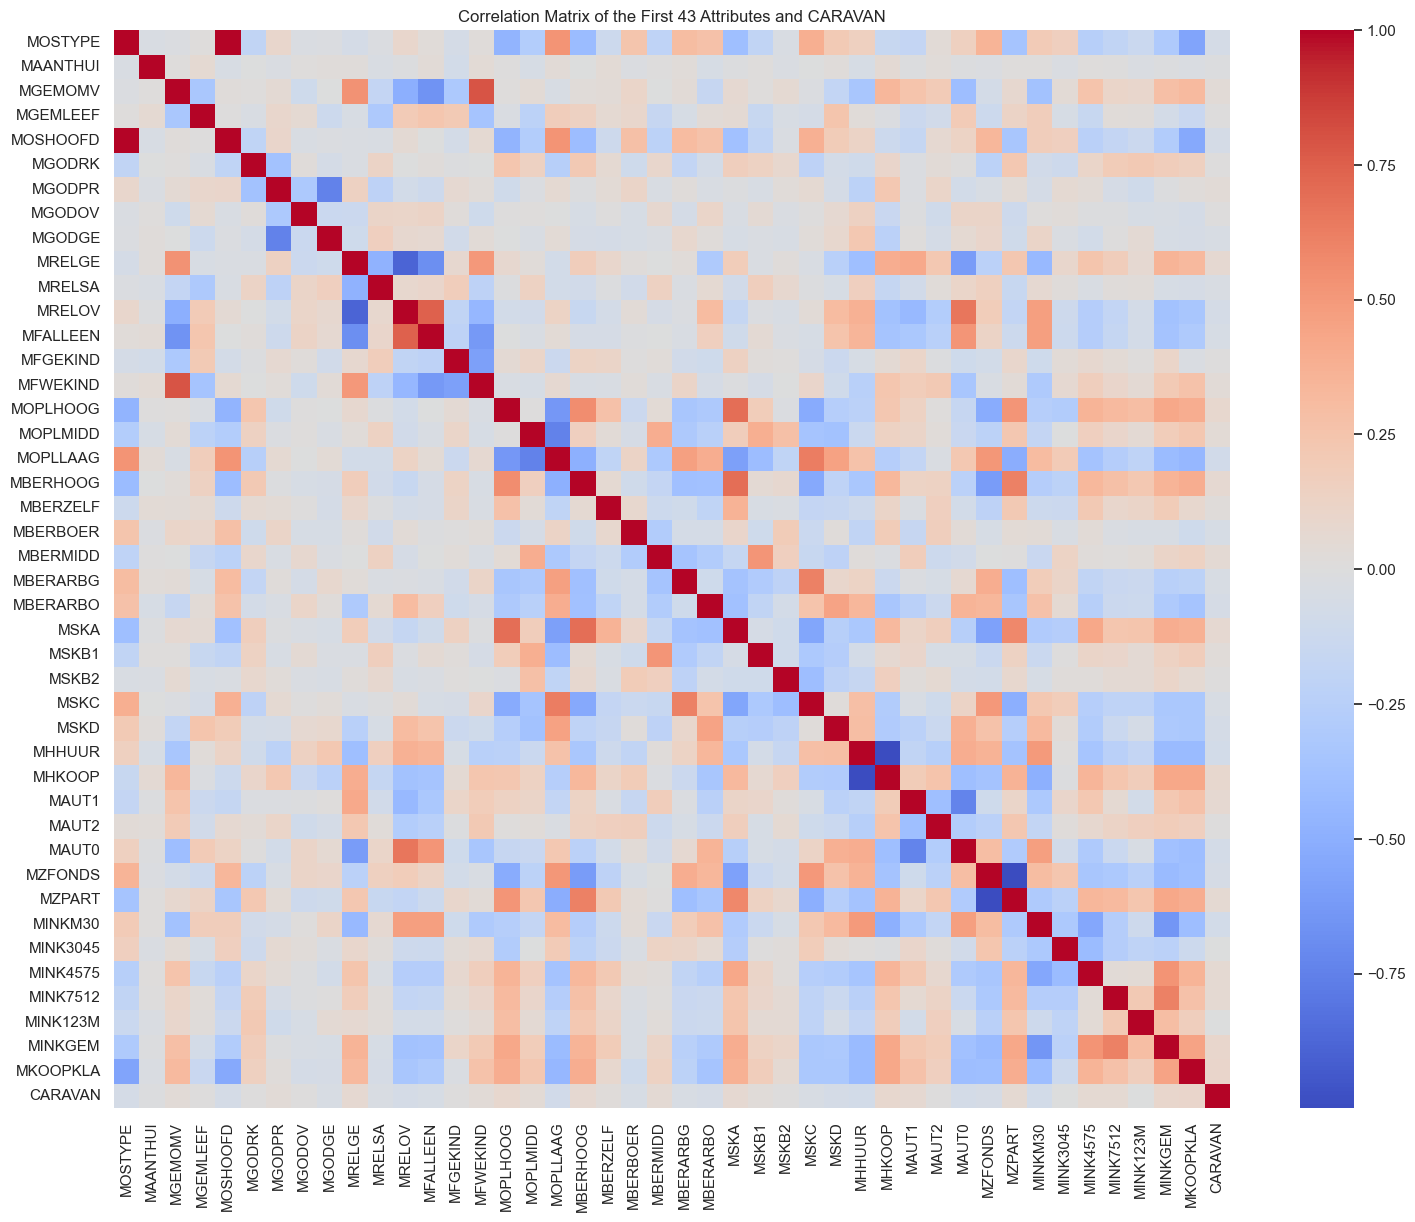

In [130]:
# Correlation matrix for the first 43 columns and the CARAVAN column
plt.figure(figsize=(18, 14))

subset_corr = train_data.iloc[:, :43].join(train_data['CARAVAN']).corr()

sns.heatmap(subset_corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of the First 43 Attributes and CARAVAN')
plt.show()

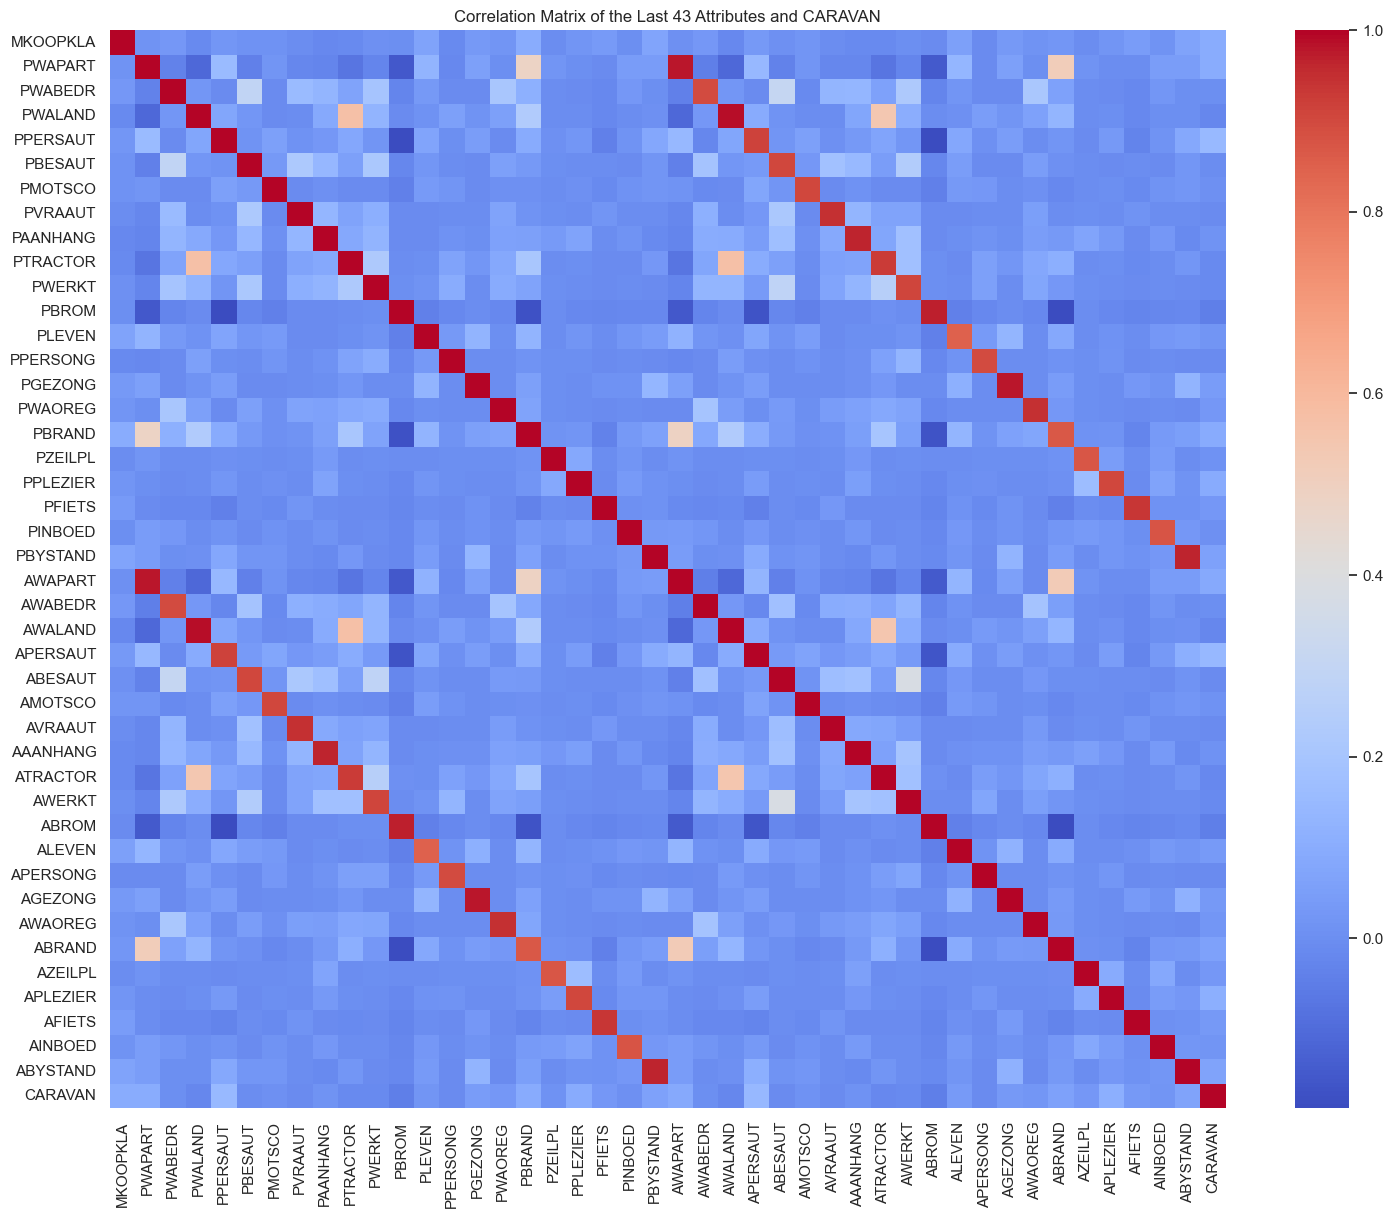

In [131]:
# Correlation matrix for the last 43 columns and the CARAVAN column
plt.figure(figsize=(18, 14))

subset_corr_last = train_data.iloc[:, -44:].corr()  # Includes the last 43 columns and CARAVAN

sns.heatmap(subset_corr_last, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of the Last 43 Attributes and CARAVAN')
plt.show()
